# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

12:17:14 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=426355;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=359979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#50\50]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=943613;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=483762;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=536420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=146982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

12:17:16 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=1560;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=911789;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#89\89]8;;\

12:17:17 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=421315;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=68395;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#89\89]8;;\

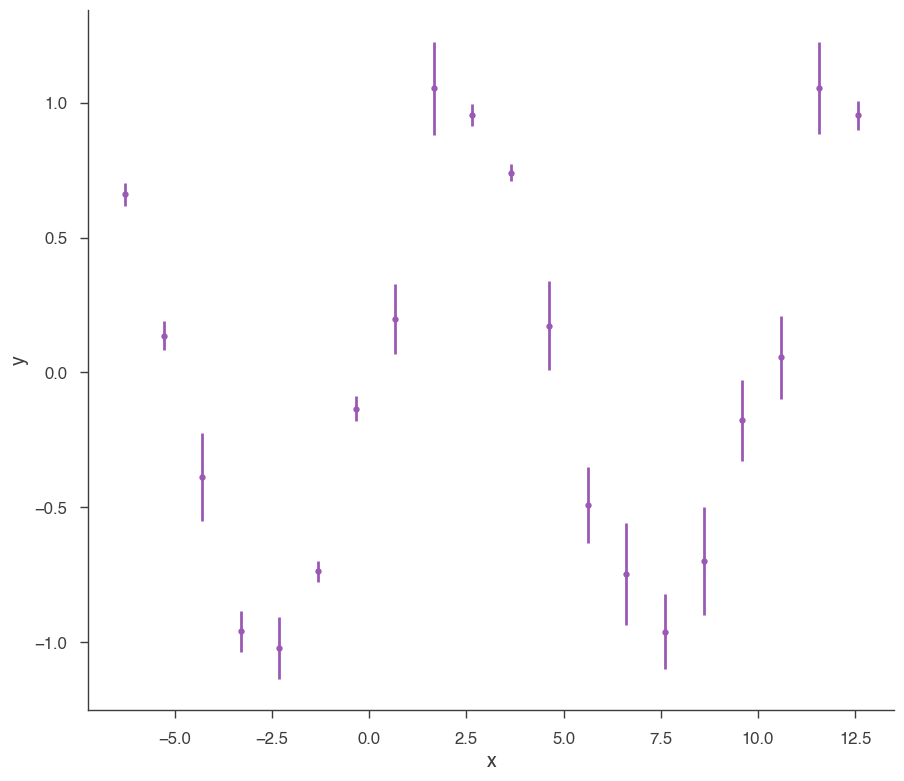

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

12:17:18 INFO      sampler set to emcee                                                    ]8;id=930716;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=564610;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

12:17:22 INFO      Mean acceptance fraction: 0.7166                                            ]8;id=451328;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=842434;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

12:17:23 INFO      fit restored to maximum of posterior                                         ]8;id=63786;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=672940;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=664157;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=178988;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.72 -0.20 +0.19) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.91 -0.09 +0.07) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.991539
total,-7.991539


Values of statistical measures:

,statistical measures
AIC,20.688960
BIC,21.974542
DIC,19.822367
PDIC,1.914459


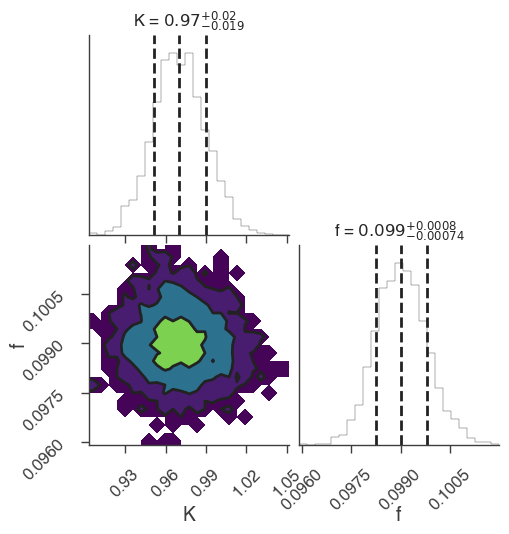

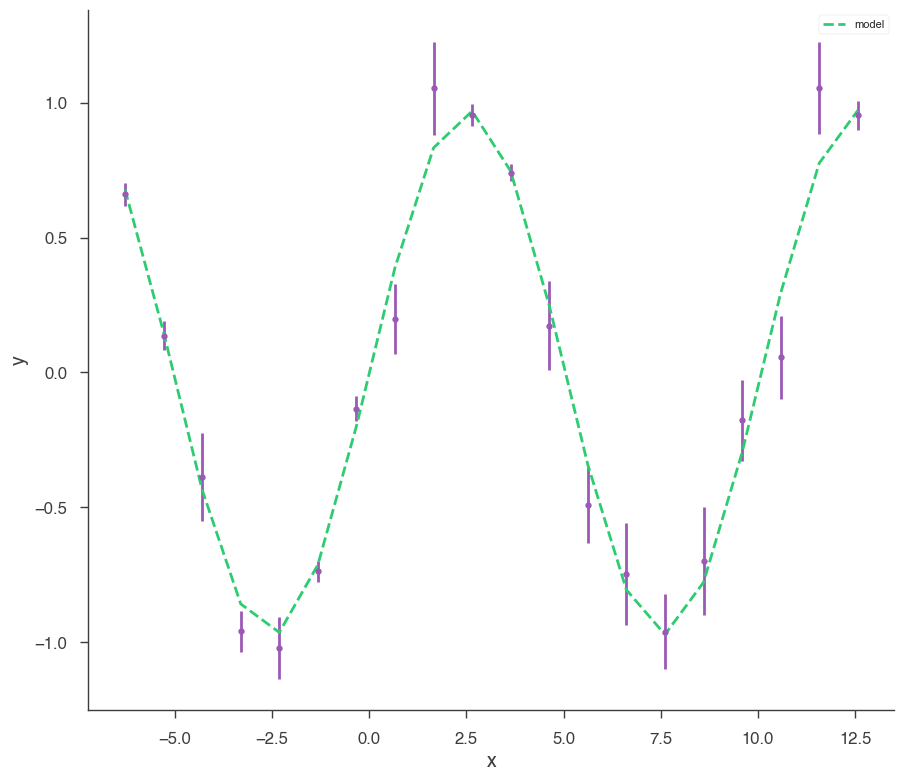

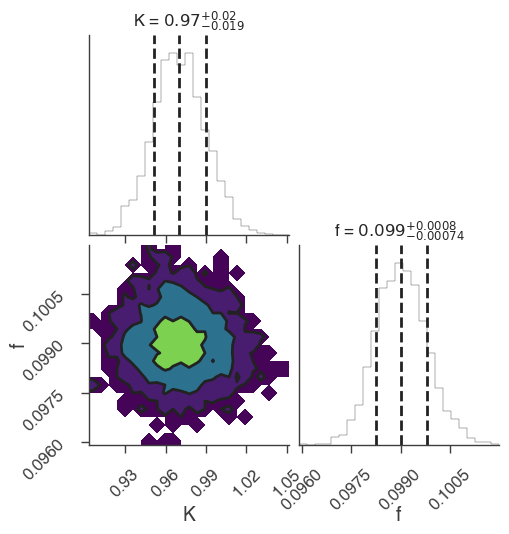

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

12:17:24 INFO      sampler set to multinest                                                ]8;id=684478;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=246927;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


 ln(ev)=  -16.501338961689537      +/-  0.13671062787758598     
 Total Likelihood Evaluations:         5339
 Sampling finished. Exiting MultiNest
  analysing data from chains/fit-.txt


12:17:26 INFO      fit restored to maximum of posterior                                         ]8;id=194986;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=998722;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=434014;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=163415;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.71 -0.20 +0.19) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.91 -0.08 +0.09) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.991878
total,-7.991878


Values of statistical measures:

,statistical measures
AIC,20.689638
BIC,21.975220
DIC,20.023299
PDIC,2.018941
log(Z),-7.166440


         INFO      deleting the chain directory chains                                     ]8;id=428130;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=720497;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

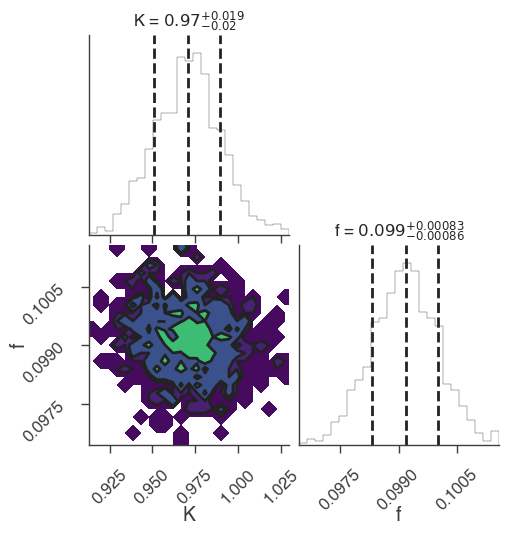

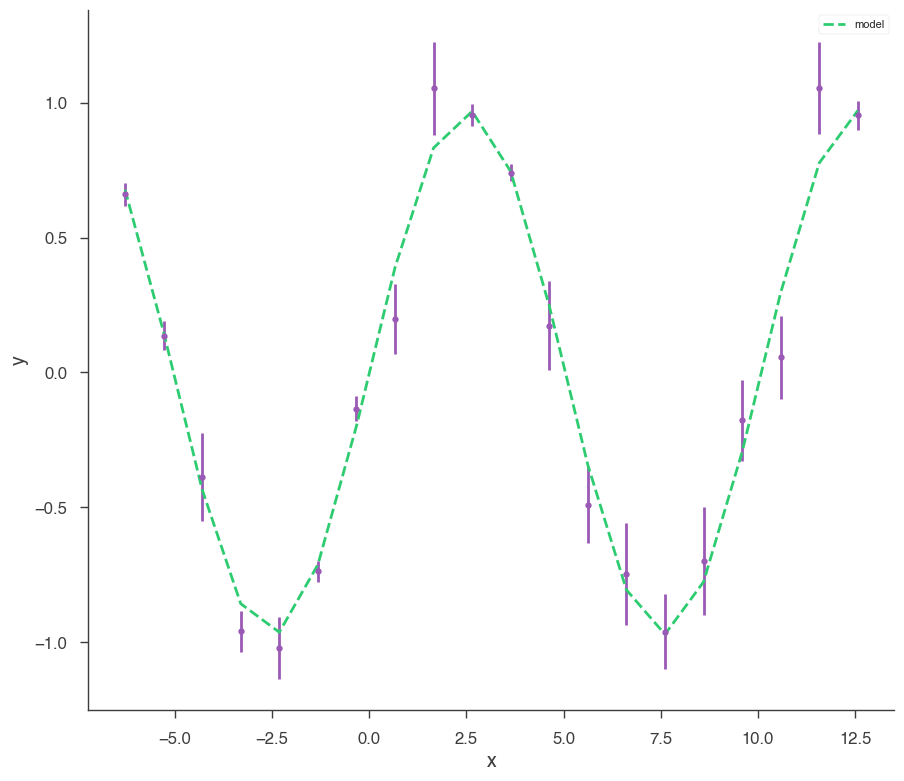

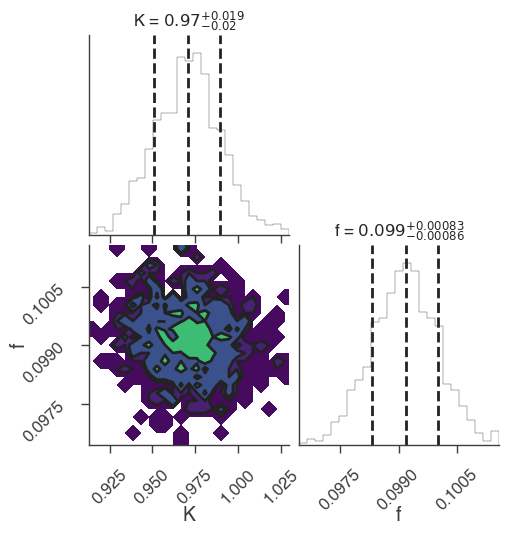

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

         INFO      sampler set to dynesty_nested                                           ]8;id=316813;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=722506;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

0it [00:00, ?it/s]

122it [00:00, 1218.95it/s, bound: 0 | nc: 1 | ncall: 545 | eff(%): 22.385 | loglstar:   -inf < -2366.186 <    inf | logz: -2373.053 +/-  0.128 | dlogz: 2362.568 >  0.409]

244it [00:00, 1116.69it/s, bound: 0 | nc: 1 | ncall: 724 | eff(%): 33.702 | loglstar:   -inf < -1759.561 <    inf | logz: -1765.721 +/-  0.118 | dlogz: 1752.734 >  0.409]

357it [00:00, 991.77it/s, bound: 0 | nc: 1 | ncall: 946 | eff(%): 37.738 | loglstar:   -inf < -1503.772 <    inf | logz: -1510.420 +/-  0.121 | dlogz: 1497.434 >  0.409] 

458it [00:00, 822.12it/s, bound: 0 | nc: 2 | ncall: 1254 | eff(%): 36.523 | loglstar:   -inf < -1334.594 <    inf | logz: -1341.800 +/-  0.126 | dlogz: 1328.706 >  0.409]

544it [00:00, 741.83it/s, bound: 0 | nc: 2 | ncall: 1526 | eff(%): 35.649 | loglstar:   -inf < -1222.053 <    inf | logz: -1228.627 +/-  0.121 | dlogz: 1214.702 >  0.409]

621it [00:00, 637.40it/s, bound: 0 | nc: 2 | ncall: 1839 | eff(%): 33.768 | loglstar:   -inf < -1143.715 <    inf | logz: -1150.631 +/-  0.124 | dlogz: 1136.646 >  0.409]

688it [00:00, 555.76it/s, bound: 0 | nc: 11 | ncall: 2179 | eff(%): 31.574 | loglstar:   -inf < -1089.909 <    inf | logz: -1096.995 +/-  0.127 | dlogz: 1082.952 >  0.409]

747it [00:01, 472.02it/s, bound: 0 | nc: 2 | ncall: 2545 | eff(%): 29.352 | loglstar:   -inf < -1052.533 <    inf | logz: -1059.613 +/-  0.124 | dlogz: 1045.155 >  0.409] 

797it [00:01, 424.58it/s, bound: 0 | nc: 13 | ncall: 2875 | eff(%): 27.722 | loglstar:   -inf < -1017.657 <    inf | logz: -1025.826 +/-  0.138 | dlogz: 1012.307 >  0.409]

842it [00:01, 367.49it/s, bound: 0 | nc: 10 | ncall: 3269 | eff(%): 25.757 | loglstar:   -inf < -873.018 <    inf | logz: -881.599 +/-  0.143 | dlogz: 868.815 >  0.409]   

881it [00:01, 334.02it/s, bound: 0 | nc: 1 | ncall: 3693 | eff(%): 23.856 | loglstar:   -inf < -767.630 <    inf | logz: -776.497 +/-  0.148 | dlogz: 765.887 >  0.409] 

916it [00:01, 268.53it/s, bound: 0 | nc: 27 | ncall: 4185 | eff(%): 21.888 | loglstar:   -inf < -656.101 <    inf | logz: -664.547 +/-  0.141 | dlogz: 650.808 >  0.409]

945it [00:02, 250.83it/s, bound: 0 | nc: 6 | ncall: 4500 | eff(%): 21.000 | loglstar:   -inf < -598.456 <    inf | logz: -607.496 +/-  0.150 | dlogz: 600.437 >  0.409] 

972it [00:02, 238.23it/s, bound: 0 | nc: 3 | ncall: 4775 | eff(%): 20.356 | loglstar:   -inf < -525.612 <    inf | logz: -534.602 +/-  0.147 | dlogz: 524.404 >  0.409]

997it [00:02, 205.59it/s, bound: 0 | nc: 5 | ncall: 5141 | eff(%): 19.393 | loglstar:   -inf < -473.850 <    inf | logz: -482.666 +/-  0.143 | dlogz: 471.294 >  0.409]

1019it [00:02, 196.41it/s, bound: 0 | nc: 3 | ncall: 5425 | eff(%): 18.783 | loglstar:   -inf < -439.886 <    inf | logz: -448.771 +/-  0.142 | dlogz: 437.109 >  0.409]

1039it [00:02, 182.80it/s, bound: 0 | nc: 26 | ncall: 5718 | eff(%): 18.171 | loglstar:   -inf < -404.258 <    inf | logz: -413.476 +/-  0.150 | dlogz: 406.124 >  0.409]

1058it [00:02, 167.95it/s, bound: 0 | nc: 19 | ncall: 6043 | eff(%): 17.508 | loglstar:   -inf < -382.148 <    inf | logz: -390.197 +/-  0.135 | dlogz: 380.001 >  0.409]

1077it [00:02, 170.67it/s, bound: 0 | nc: 20 | ncall: 6268 | eff(%): 17.183 | loglstar:   -inf < -356.367 <    inf | logz: -364.650 +/-  0.139 | dlogz: 354.493 >  0.409]

1095it [00:02, 172.69it/s, bound: 0 | nc: 35 | ncall: 6488 | eff(%): 16.877 | loglstar:   -inf < -342.395 <    inf | logz: -350.961 +/-  0.138 | dlogz: 340.875 >  0.409]

1113it [00:03, 157.25it/s, bound: 0 | nc: 2 | ncall: 6779 | eff(%): 16.418 | loglstar:   -inf < -325.031 <    inf | logz: -333.126 +/-  0.137 | dlogz: 322.681 >  0.409] 

1130it [00:03, 160.01it/s, bound: 0 | nc: 2 | ncall: 6998 | eff(%): 16.147 | loglstar:   -inf < -304.192 <    inf | logz: -312.678 +/-  0.144 | dlogz: 302.767 >  0.409]

1147it [00:03, 129.64it/s, bound: 0 | nc: 25 | ncall: 7429 | eff(%): 15.439 | loglstar:   -inf < -286.909 <    inf | logz: -296.323 +/-  0.150 | dlogz: 287.757 >  0.409]

1161it [00:03, 120.22it/s, bound: 0 | nc: 53 | ncall: 7759 | eff(%): 14.963 | loglstar:   -inf < -278.715 <    inf | logz: -286.852 +/-  0.133 | dlogz: 276.218 >  0.409]

1174it [00:03, 114.53it/s, bound: 0 | nc: 1 | ncall: 8057 | eff(%): 14.571 | loglstar:   -inf < -270.369 <    inf | logz: -279.683 +/-  0.145 | dlogz: 270.217 >  0.409] 

1189it [00:03, 114.39it/s, bound: 0 | nc: 73 | ncall: 8354 | eff(%): 14.233 | loglstar:   -inf < -263.403 <    inf | logz: -271.244 +/-  0.134 | dlogz: 260.471 >  0.409]

1201it [00:03, 103.23it/s, bound: 0 | nc: 193 | ncall: 8698 | eff(%): 13.808 | loglstar:   -inf < -256.625 <    inf | logz: -264.698 +/-  0.137 | dlogz: 253.989 >  0.409]

1212it [00:04, 102.27it/s, bound: 0 | nc: 15 | ncall: 8934 | eff(%): 13.566 | loglstar:   -inf < -249.246 <    inf | logz: -258.361 +/-  0.142 | dlogz: 248.160 >  0.409] 

1223it [00:04, 98.62it/s, bound: 0 | nc: 1 | ncall: 9209 | eff(%): 13.280 | loglstar:   -inf < -245.435 <    inf | logz: -254.133 +/-  0.134 | dlogz: 243.453 >  0.409]  

1237it [00:04, 106.59it/s, bound: 0 | nc: 26 | ncall: 9444 | eff(%): 13.098 | loglstar:   -inf < -233.831 <    inf | logz: -243.343 +/-  0.148 | dlogz: 233.812 >  0.409]

1248it [00:04, 97.19it/s, bound: 0 | nc: 3 | ncall: 9736 | eff(%): 12.818 | loglstar:   -inf < -229.466 <    inf | logz: -237.954 +/-  0.138 | dlogz: 227.318 >  0.409]  

1258it [00:04, 86.30it/s, bound: 0 | nc: 9 | ncall: 10082 | eff(%): 12.478 | loglstar:   -inf < -224.124 <    inf | logz: -232.399 +/-  0.137 | dlogz: 221.558 >  0.409]

1267it [00:04, 75.71it/s, bound: 0 | nc: 47 | ncall: 10401 | eff(%): 12.182 | loglstar:   -inf < -220.649 <    inf | logz: -228.734 +/-  0.134 | dlogz: 217.732 >  0.409]

1277it [00:04, 79.95it/s, bound: 0 | nc: 53 | ncall: 10650 | eff(%): 11.991 | loglstar:   -inf < -214.231 <    inf | logz: -222.704 +/-  0.139 | dlogz: 211.926 >  0.409]

1288it [00:04, 85.74it/s, bound: 0 | nc: 28 | ncall: 10866 | eff(%): 11.853 | loglstar:   -inf < -209.180 <    inf | logz: -217.699 +/-  0.137 | dlogz: 206.807 >  0.409]

1298it [00:05, 88.88it/s, bound: 0 | nc: 31 | ncall: 11055 | eff(%): 11.741 | loglstar:   -inf < -205.330 <    inf | logz: -213.376 +/-  0.136 | dlogz: 202.305 >  0.409]

1309it [00:05, 92.15it/s, bound: 0 | nc: 70 | ncall: 11349 | eff(%): 11.534 | loglstar:   -inf < -200.597 <    inf | logz: -209.024 +/-  0.138 | dlogz: 198.094 >  0.409]

1319it [00:05, 79.04it/s, bound: 0 | nc: 53 | ncall: 11741 | eff(%): 11.234 | loglstar:   -inf < -195.772 <    inf | logz: -203.892 +/-  0.135 | dlogz: 192.737 >  0.409]

1329it [00:05, 83.28it/s, bound: 0 | nc: 14 | ncall: 11971 | eff(%): 11.102 | loglstar:   -inf < -189.800 <    inf | logz: -198.949 +/-  0.142 | dlogz: 188.276 >  0.409]

1340it [00:05, 89.46it/s, bound: 0 | nc: 17 | ncall: 12192 | eff(%): 10.991 | loglstar:   -inf < -181.936 <    inf | logz: -190.636 +/-  0.140 | dlogz: 179.664 >  0.409]

1350it [00:05, 87.51it/s, bound: 0 | nc: 24 | ncall: 12562 | eff(%): 10.747 | loglstar:   -inf < -178.819 <    inf | logz: -187.094 +/-  0.135 | dlogz: 175.922 >  0.409]

1360it [00:05, 78.57it/s, bound: 0 | nc: 8 | ncall: 12935 | eff(%): 10.514 | loglstar:   -inf < -177.266 <    inf | logz: -185.040 +/-  0.131 | dlogz: 173.667 >  0.409] 

1369it [00:05, 77.08it/s, bound: 0 | nc: 9 | ncall: 13217 | eff(%): 10.358 | loglstar:   -inf < -171.371 <    inf | logz: -179.709 +/-  0.140 | dlogz: 168.497 >  0.409]

1377it [00:06, 70.68it/s, bound: 0 | nc: 15 | ncall: 13515 | eff(%): 10.189 | loglstar:   -inf < -168.227 <    inf | logz: -176.865 +/-  0.136 | dlogz: 165.632 >  0.409]

1387it [00:06, 74.58it/s, bound: 0 | nc: 79 | ncall: 13781 | eff(%): 10.065 | loglstar:   -inf < -161.616 <    inf | logz: -169.908 +/-  0.138 | dlogz: 158.599 >  0.409]

1395it [00:06, 53.31it/s, bound: 1 | nc: 1 | ncall: 13895 | eff(%): 10.040 | loglstar:   -inf < -158.415 <    inf | logz: -167.333 +/-  0.137 | dlogz: 156.175 >  0.409] 

1466it [00:06, 185.39it/s, bound: 1 | nc: 1 | ncall: 13998 | eff(%): 10.473 | loglstar:   -inf < -132.666 <    inf | logz: -140.360 +/-  0.131 | dlogz: 128.659 >  0.409]

1554it [00:06, 340.16it/s, bound: 1 | nc: 1 | ncall: 14149 | eff(%): 10.983 | loglstar:   -inf < -103.475 <    inf | logz: -111.541 +/-  0.136 | dlogz: 99.655 >  0.409] 

1640it [00:06, 463.54it/s, bound: 1 | nc: 4 | ncall: 14307 | eff(%): 11.463 | loglstar:   -inf < -88.168 <    inf | logz: -96.420 +/-  0.135 | dlogz: 84.290 >  0.409]  

1709it [00:06, 519.89it/s, bound: 1 | nc: 3 | ncall: 14473 | eff(%): 11.808 | loglstar:   -inf < -75.187 <    inf | logz: -83.231 +/-  0.134 | dlogz: 70.889 >  0.409]

1769it [00:07, 373.84it/s, bound: 2 | nc: 1 | ncall: 14550 | eff(%): 12.158 | loglstar:   -inf < -65.948 <    inf | logz: -74.683 +/-  0.137 | dlogz: 62.259 >  0.409]

1869it [00:07, 503.68it/s, bound: 2 | nc: 1 | ncall: 14699 | eff(%): 12.715 | loglstar:   -inf < -52.967 <    inf | logz: -61.043 +/-  0.136 | dlogz: 48.366 >  0.409]

1948it [00:07, 568.89it/s, bound: 2 | nc: 2 | ncall: 14846 | eff(%): 13.121 | loglstar:   -inf < -45.006 <    inf | logz: -53.594 +/-  0.136 | dlogz: 40.735 >  0.409]

2026it [00:07, 620.65it/s, bound: 2 | nc: 2 | ncall: 15004 | eff(%): 13.503 | loglstar:   -inf < -38.181 <    inf | logz: -46.841 +/-  0.139 | dlogz: 33.781 >  0.409]

2098it [00:07, 427.65it/s, bound: 3 | nc: 1 | ncall: 15135 | eff(%): 13.862 | loglstar:   -inf < -33.905 <    inf | logz: -42.204 +/-  0.136 | dlogz: 28.929 >  0.409]

2206it [00:07, 556.23it/s, bound: 3 | nc: 1 | ncall: 15274 | eff(%): 14.443 | loglstar:   -inf < -27.680 <    inf | logz: -36.100 +/-  0.137 | dlogz: 22.550 >  0.409]

2285it [00:07, 607.00it/s, bound: 3 | nc: 1 | ncall: 15404 | eff(%): 14.834 | loglstar:   -inf < -23.483 <    inf | logz: -32.084 +/-  0.139 | dlogz: 18.335 >  0.409]

2360it [00:08, 614.45it/s, bound: 3 | nc: 1 | ncall: 15559 | eff(%): 15.168 | loglstar:   -inf < -20.816 <    inf | logz: -29.289 +/-  0.137 | dlogz: 15.340 >  0.409]

2431it [00:08, 415.91it/s, bound: 4 | nc: 2 | ncall: 15710 | eff(%): 15.474 | loglstar:   -inf < -18.683 <    inf | logz: -27.126 +/-  0.137 | dlogz: 12.998 >  0.409]

2536it [00:08, 534.09it/s, bound: 4 | nc: 2 | ncall: 15850 | eff(%): 16.000 | loglstar:   -inf < -16.400 <    inf | logz: -24.696 +/-  0.136 | dlogz: 10.298 >  0.409]

2646it [00:08, 653.01it/s, bound: 4 | nc: 4 | ncall: 16037 | eff(%): 16.499 | loglstar:   -inf < -14.060 <    inf | logz: -22.638 +/-  0.137 | dlogz:  8.007 >  0.409]

2729it [00:08, 659.41it/s, bound: 4 | nc: 3 | ncall: 16239 | eff(%): 16.805 | loglstar:   -inf < -13.092 <    inf | logz: -21.439 +/-  0.137 | dlogz:  6.599 >  0.409]

2808it [00:08, 473.79it/s, bound: 5 | nc: 1 | ncall: 16362 | eff(%): 17.162 | loglstar:   -inf < -12.178 <    inf | logz: -20.580 +/-  0.136 | dlogz:  5.562 >  0.409]

2910it [00:09, 576.09it/s, bound: 5 | nc: 2 | ncall: 16494 | eff(%): 17.643 | loglstar:   -inf < -11.290 <    inf | logz: -19.693 +/-  0.136 | dlogz:  4.426 >  0.409]

3005it [00:09, 654.79it/s, bound: 5 | nc: 1 | ncall: 16643 | eff(%): 18.056 | loglstar:   -inf < -10.533 <    inf | logz: -19.005 +/-  0.136 | dlogz:  3.517 >  0.409]

3086it [00:09, 669.29it/s, bound: 5 | nc: 8 | ncall: 16831 | eff(%): 18.335 | loglstar:   -inf < -10.001 <    inf | logz: -18.512 +/-  0.136 | dlogz:  2.851 >  0.409]

3164it [00:09, 462.95it/s, bound: 6 | nc: 3 | ncall: 16958 | eff(%): 18.658 | loglstar:   -inf < -9.649 <    inf | logz: -18.127 +/-  0.137 | dlogz:  2.314 >  0.409] 

3276it [00:09, 586.11it/s, bound: 6 | nc: 1 | ncall: 17096 | eff(%): 19.162 | loglstar:   -inf < -9.291 <    inf | logz: -17.710 +/-  0.136 | dlogz:  1.711 >  0.409]

3374it [00:09, 669.41it/s, bound: 6 | nc: 1 | ncall: 17244 | eff(%): 19.566 | loglstar:   -inf < -8.996 <    inf | logz: -17.430 +/-  0.136 | dlogz:  1.306 >  0.409]

3458it [00:09, 707.67it/s, bound: 6 | nc: 1 | ncall: 17403 | eff(%): 19.870 | loglstar:   -inf < -8.798 <    inf | logz: -17.236 +/-  0.136 | dlogz:  1.028 >  0.409]

3542it [00:10, 500.70it/s, bound: 7 | nc: 2 | ncall: 17557 | eff(%): 20.174 | loglstar:   -inf < -8.651 <    inf | logz: -17.080 +/-  0.136 | dlogz:  0.809 >  0.409]

3649it [00:10, 610.31it/s, bound: 7 | nc: 1 | ncall: 17699 | eff(%): 20.617 | loglstar:   -inf < -8.520 <    inf | logz: -16.927 +/-  0.136 | dlogz:  0.598 >  0.409]

3738it [00:10, 670.81it/s, bound: 7 | nc: 1 | ncall: 17847 | eff(%): 20.945 | loglstar:   -inf < -8.414 <    inf | logz: -16.829 +/-  0.136 | dlogz:  0.466 >  0.409]

3784it [00:10, 358.50it/s, +400 | bound: 7 | nc: 1 | ncall: 18329 | eff(%): 23.336 | loglstar:   -inf < -8.021 <    inf | logz: -16.431 +/-  0.136 | dlogz:  0.001 >  0.409]

12:17:37 INFO      fit restored to maximum of posterior                                         ]8;id=329691;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=997128;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=964155;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=733206;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.71 -0.19 +0.20) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.91 +/- 0.08) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.991346
total,-7.991346


Values of statistical measures:

,statistical measures
AIC,20.688574
BIC,21.974156
DIC,19.889748
PDIC,1.953756
log(Z),-7.135795


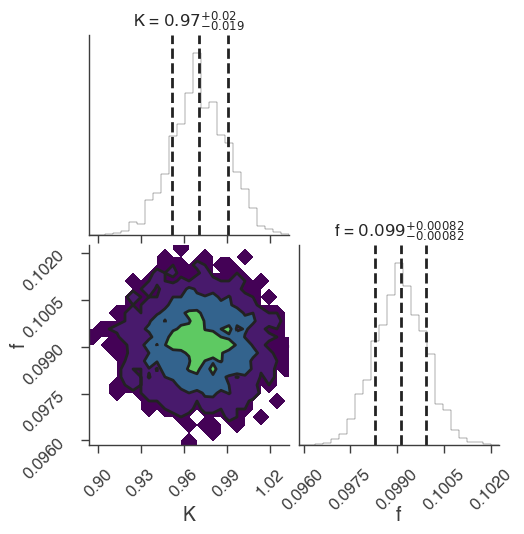

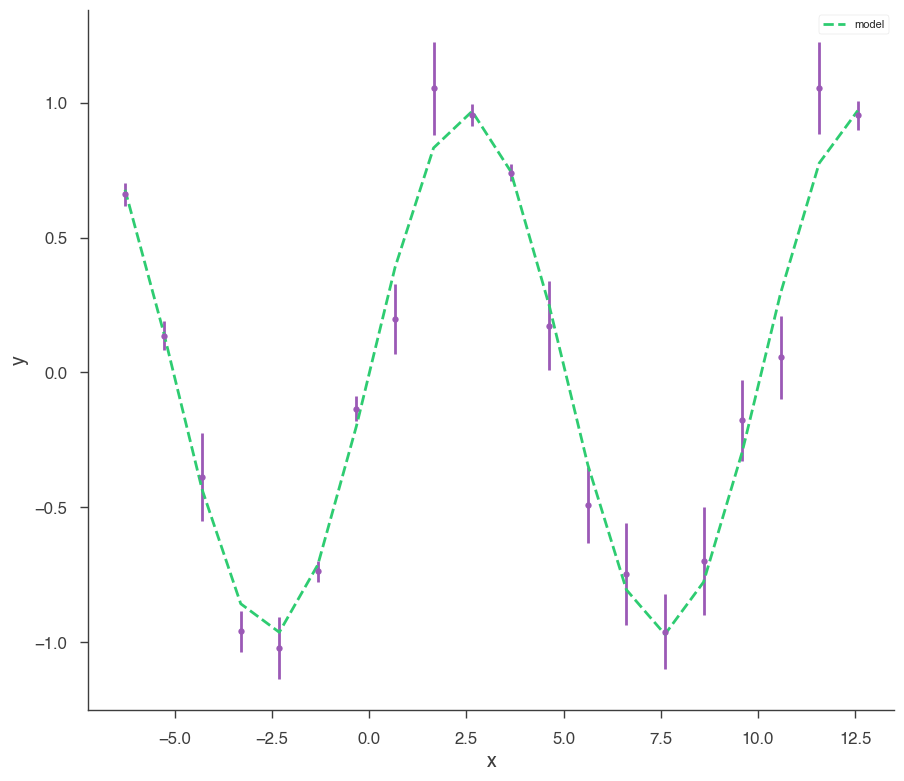

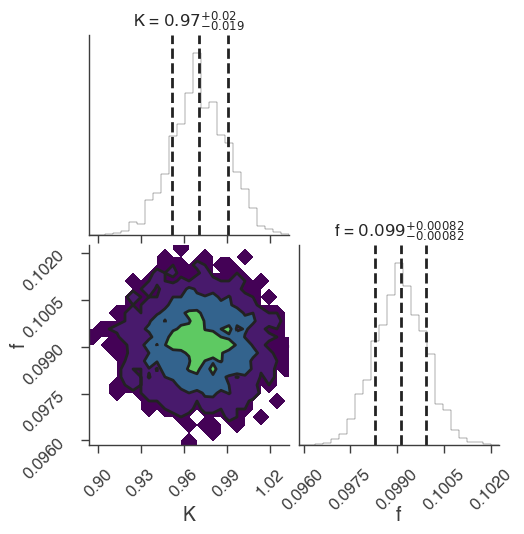

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

12:17:38 INFO      sampler set to dynesty_dynamic                                          ]8;id=438144;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=595773;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

0it [00:00, ?it/s]

58it [00:00, 579.00it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 64 | eff(%): 10.284 | loglstar:   -inf < -3217.902 <    inf | logz: -3224.922 +/-  0.118 | dlogz: 3209.000 >  0.010]

180it [00:00, 953.35it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 222 | eff(%): 24.931 | loglstar:   -inf < -2159.550 <    inf | logz: -2166.775 +/-  0.119 | dlogz: 2148.115 >  0.010]

292it [00:00, 1025.51it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 414 | eff(%): 31.947 | loglstar:   -inf < -1784.926 <    inf | logz: -1791.582 +/-  0.108 | dlogz: 1774.494 >  0.010]

395it [00:00, 946.11it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 623 | eff(%): 35.174 | loglstar:   -inf < -1599.316 <    inf | logz: -1606.676 +/-  0.115 | dlogz: 1596.998 >  0.010] 

491it [00:00, 830.83it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 866 | eff(%): 35.944 | loglstar:   -inf < -1446.193 <    inf | logz: -1452.506 +/-  0.106 | dlogz: 1441.360 >  0.010]

577it [00:00, 739.48it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 1135 | eff(%): 35.291 | loglstar:   -inf < -1327.388 <    inf | logz: -1334.301 +/-  0.113 | dlogz: 1323.435 >  0.010]

654it [00:00, 636.80it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 1446 | eff(%): 33.607 | loglstar:   -inf < -1245.016 <    inf | logz: -1252.977 +/-  0.121 | dlogz: 1242.885 >  0.010]

721it [00:01, 588.53it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 1725 | eff(%): 32.404 | loglstar:   -inf < -1181.925 <    inf | logz: -1188.978 +/-  0.113 | dlogz: 1177.566 >  0.010]

782it [00:01, 519.31it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 2009 | eff(%): 31.168 | loglstar:   -inf < -1144.192 <    inf | logz: -1151.132 +/-  0.108 | dlogz: 1139.400 >  0.010]

836it [00:01, 463.80it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 2322 | eff(%): 29.624 | loglstar:   -inf < -1112.808 <    inf | logz: -1120.118 +/-  0.112 | dlogz: 1108.426 >  0.010]

884it [00:01, 428.30it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 2605 | eff(%): 28.470 | loglstar:   -inf < -1080.810 <    inf | logz: -1088.267 +/-  0.116 | dlogz: 1076.584 >  0.010]

928it [00:01, 370.25it/s, batch: 0 | bound: 0 | nc: 21 | ncall: 2957 | eff(%): 26.844 | loglstar:   -inf < -1061.272 <    inf | logz: -1068.594 +/-  0.114 | dlogz: 1056.691 >  0.010]

967it [00:01, 343.60it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 3250 | eff(%): 25.787 | loglstar:   -inf < -1048.203 <    inf | logz: -1054.642 +/-  0.106 | dlogz: 1042.309 >  0.010] 

1003it [00:01, 319.10it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 3540 | eff(%): 24.827 | loglstar:   -inf < -982.243 <    inf | logz: -991.155 +/-  0.133 | dlogz: 987.604 >  0.010]  

1036it [00:02, 282.20it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 3833 | eff(%): 23.910 | loglstar:   -inf < -918.339 <    inf | logz: -926.856 +/-  0.127 | dlogz: 915.894 >  0.010]

1065it [00:02, 280.05it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 4036 | eff(%): 23.479 | loglstar:   -inf < -807.968 <    inf | logz: -816.843 +/-  0.130 | dlogz: 806.737 >  0.010] 

1094it [00:02, 251.55it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 4355 | eff(%): 22.533 | loglstar:   -inf < -714.700 <    inf | logz: -722.757 +/-  0.125 | dlogz: 711.023 >  0.010]

1120it [00:02, 237.81it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 4640 | eff(%): 21.790 | loglstar:   -inf < -661.989 <    inf | logz: -671.090 +/-  0.133 | dlogz: 661.738 >  0.010]

1144it [00:02, 236.89it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 4868 | eff(%): 21.311 | loglstar:   -inf < -599.565 <    inf | logz: -607.342 +/-  0.121 | dlogz: 594.999 >  0.010] 

1168it [00:02, 198.73it/s, batch: 0 | bound: 0 | nc: 36 | ncall: 5268 | eff(%): 20.250 | loglstar:   -inf < -526.420 <    inf | logz: -535.660 +/-  0.136 | dlogz: 529.928 >  0.010]

1190it [00:02, 201.88it/s, batch: 0 | bound: 0 | nc: 15 | ncall: 5495 | eff(%): 19.850 | loglstar:   -inf < -475.474 <    inf | logz: -483.747 +/-  0.124 | dlogz: 471.710 >  0.010]

1211it [00:02, 198.45it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 5739 | eff(%): 19.410 | loglstar:   -inf < -446.687 <    inf | logz: -454.206 +/-  0.118 | dlogz: 441.548 >  0.010] 

1232it [00:03, 169.43it/s, batch: 0 | bound: 0 | nc: 23 | ncall: 6142 | eff(%): 18.549 | loglstar:   -inf < -420.337 <    inf | logz: -428.518 +/-  0.120 | dlogz: 415.989 >  0.010]

1250it [00:03, 166.90it/s, batch: 0 | bound: 0 | nc: 21 | ncall: 6379 | eff(%): 18.171 | loglstar:   -inf < -394.970 <    inf | logz: -403.630 +/-  0.129 | dlogz: 391.889 >  0.010]

1268it [00:03, 149.59it/s, batch: 0 | bound: 0 | nc: 24 | ncall: 6727 | eff(%): 17.545 | loglstar:   -inf < -377.470 <    inf | logz: -386.324 +/-  0.126 | dlogz: 374.433 >  0.010]

1284it [00:03, 144.62it/s, batch: 0 | bound: 0 | nc: 24 | ncall: 6985 | eff(%): 17.154 | loglstar:   -inf < -358.982 <    inf | logz: -367.374 +/-  0.125 | dlogz: 355.157 >  0.010]

1299it [00:03, 127.33it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 7354 | eff(%): 16.539 | loglstar:   -inf < -349.955 <    inf | logz: -357.279 +/-  0.118 | dlogz: 344.359 >  0.010]

1313it [00:03, 119.04it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 7659 | eff(%): 16.093 | loglstar:   -inf < -339.886 <    inf | logz: -349.017 +/-  0.129 | dlogz: 337.323 >  0.010] 

1326it [00:03, 120.61it/s, batch: 0 | bound: 0 | nc: 28 | ncall: 7892 | eff(%): 15.801 | loglstar:   -inf < -326.302 <    inf | logz: -335.480 +/-  0.130 | dlogz: 323.772 >  0.010]

1344it [00:04, 133.72it/s, batch: 0 | bound: 0 | nc: 26 | ncall: 8117 | eff(%): 15.597 | loglstar:   -inf < -307.694 <    inf | logz: -315.480 +/-  0.119 | dlogz: 304.920 >  0.010]

1361it [00:04, 140.76it/s, batch: 0 | bound: 0 | nc: 25 | ncall: 8447 | eff(%): 15.212 | loglstar:   -inf < -301.471 <    inf | logz: -310.280 +/-  0.121 | dlogz: 300.058 >  0.010]

1378it [00:04, 148.11it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 8654 | eff(%): 15.054 | loglstar:   -inf < -292.919 <    inf | logz: -300.783 +/-  0.120 | dlogz: 290.192 >  0.010]

1397it [00:04, 159.52it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 8880 | eff(%): 14.893 | loglstar:   -inf < -280.342 <    inf | logz: -288.810 +/-  0.126 | dlogz: 278.593 >  0.010]

1414it [00:04, 142.06it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 9228 | eff(%): 14.535 | loglstar:   -inf < -270.639 <    inf | logz: -279.266 +/-  0.125 | dlogz: 269.040 >  0.010] 

1429it [00:04, 137.95it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 9496 | eff(%): 14.296 | loglstar:   -inf < -265.388 <    inf | logz: -273.379 +/-  0.119 | dlogz: 262.659 >  0.010]

1444it [00:04, 120.88it/s, batch: 0 | bound: 0 | nc: 17 | ncall: 9872 | eff(%): 13.922 | loglstar:   -inf < -256.723 <    inf | logz: -264.833 +/-  0.119 | dlogz: 254.065 >  0.010]

1457it [00:04, 116.51it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 10147 | eff(%): 13.685 | loglstar:   -inf < -251.546 <    inf | logz: -259.453 +/-  0.119 | dlogz: 248.621 >  0.010]

1470it [00:05, 109.27it/s, batch: 0 | bound: 0 | nc: 26 | ncall: 10491 | eff(%): 13.375 | loglstar:   -inf < -241.032 <    inf | logz: -249.540 +/-  0.125 | dlogz: 238.906 >  0.010]

1482it [00:05, 94.21it/s, batch: 0 | bound: 0 | nc: 28 | ncall: 10894 | eff(%): 13.007 | loglstar:   -inf < -235.069 <    inf | logz: -243.559 +/-  0.123 | dlogz: 232.904 >  0.010] 

1497it [00:05, 104.84it/s, batch: 0 | bound: 0 | nc: 23 | ncall: 11139 | eff(%): 12.862 | loglstar:   -inf < -225.901 <    inf | logz: -234.557 +/-  0.126 | dlogz: 224.068 >  0.010]

1509it [00:05, 102.24it/s, batch: 0 | bound: 0 | nc: 13 | ncall: 11406 | eff(%): 12.674 | loglstar:   -inf < -220.667 <    inf | logz: -229.016 +/-  0.122 | dlogz: 218.233 >  0.010]

1520it [00:05, 101.15it/s, batch: 0 | bound: 0 | nc: 17 | ncall: 11651 | eff(%): 12.509 | loglstar:   -inf < -213.890 <    inf | logz: -222.798 +/-  0.125 | dlogz: 212.288 >  0.010]

1531it [00:05, 99.26it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 11918 | eff(%): 12.329 | loglstar:   -inf < -209.374 <    inf | logz: -217.681 +/-  0.121 | dlogz: 206.798 >  0.010] 

1542it [00:05, 88.90it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 12280 | eff(%): 12.066 | loglstar:   -inf < -202.917 <    inf | logz: -211.110 +/-  0.125 | dlogz: 200.176 >  0.010]

1553it [00:05, 93.88it/s, batch: 0 | bound: 0 | nc: 35 | ncall: 12504 | eff(%): 11.942 | loglstar:   -inf < -198.363 <    inf | logz: -207.134 +/-  0.123 | dlogz: 196.414 >  0.010]

1563it [00:06, 84.38it/s, batch: 0 | bound: 0 | nc: 88 | ncall: 12816 | eff(%): 11.738 | loglstar:   -inf < -195.455 <    inf | logz: -203.713 +/-  0.121 | dlogz: 192.761 >  0.010]

1573it [00:06, 83.48it/s, batch: 0 | bound: 0 | nc: 106 | ncall: 13092 | eff(%): 11.573 | loglstar:   -inf < -193.755 <    inf | logz: -201.311 +/-  0.117 | dlogz: 190.123 >  0.010]

1582it [00:06, 73.83it/s, batch: 0 | bound: 0 | nc: 34 | ncall: 13451 | eff(%): 11.340 | loglstar:   -inf < -190.791 <    inf | logz: -198.930 +/-  0.120 | dlogz: 187.850 >  0.010] 

1590it [00:06, 74.93it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 13682 | eff(%): 11.211 | loglstar:   -inf < -187.873 <    inf | logz: -195.836 +/-  0.121 | dlogz: 184.700 >  0.010] 

1598it [00:06, 72.52it/s, batch: 0 | bound: 0 | nc: 21 | ncall: 13950 | eff(%): 11.059 | loglstar:   -inf < -185.549 <    inf | logz: -193.760 +/-  0.119 | dlogz: 182.627 >  0.010]

1606it [00:06, 67.74it/s, batch: 0 | bound: 0 | nc: 71 | ncall: 14268 | eff(%): 10.875 | loglstar:   -inf < -184.242 <    inf | logz: -191.918 +/-  0.118 | dlogz: 180.668 >  0.010]

1613it [00:06, 66.98it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 14525 | eff(%): 10.735 | loglstar:   -inf < -183.416 <    inf | logz: -190.864 +/-  0.115 | dlogz: 179.557 >  0.010]

1622it [00:06, 71.27it/s, batch: 0 | bound: 0 | nc: 24 | ncall: 14792 | eff(%): 10.607 | loglstar:   -inf < -178.096 <    inf | logz: -186.684 +/-  0.127 | dlogz: 175.760 >  0.010]

1630it [00:07, 72.19it/s, batch: 0 | bound: 0 | nc: 27 | ncall: 15044 | eff(%): 10.486 | loglstar:   -inf < -175.629 <    inf | logz: -183.937 +/-  0.122 | dlogz: 172.786 >  0.010]

1638it [00:07, 65.33it/s, batch: 0 | bound: 0 | nc: 26 | ncall: 15391 | eff(%): 10.308 | loglstar:   -inf < -171.073 <    inf | logz: -179.842 +/-  0.127 | dlogz: 169.009 >  0.010]

1646it [00:07, 68.79it/s, batch: 0 | bound: 0 | nc: 14 | ncall: 15618 | eff(%): 10.212 | loglstar:   -inf < -169.624 <    inf | logz: -177.642 +/-  0.120 | dlogz: 166.374 >  0.010]

1654it [00:07, 63.02it/s, batch: 0 | bound: 0 | nc: 55 | ncall: 15967 | eff(%): 10.044 | loglstar:   -inf < -167.217 <    inf | logz: -175.597 +/-  0.121 | dlogz: 164.402 >  0.010]

1666it [00:07, 50.09it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 16161 | eff(%):  9.999 | loglstar:   -inf < -162.884 <    inf | logz: -171.304 +/-  0.124 | dlogz: 160.145 >  0.010] 

1781it [00:07, 256.52it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 16293 | eff(%): 10.606 | loglstar:   -inf < -134.144 <    inf | logz: -142.615 +/-  0.123 | dlogz: 131.100 >  0.010]

1869it [00:07, 388.33it/s, batch: 0 | bound: 1 | nc: 3 | ncall: 16428 | eff(%): 11.041 | loglstar:   -inf < -111.170 <    inf | logz: -119.511 +/-  0.123 | dlogz: 107.766 >  0.010]

1964it [00:08, 517.09it/s, batch: 0 | bound: 1 | nc: 3 | ncall: 16577 | eff(%): 11.501 | loglstar:   -inf < -94.435 <    inf | logz: -102.616 +/-  0.121 | dlogz: 90.612 >  0.010]  

2042it [00:08, 580.40it/s, batch: 0 | bound: 1 | nc: 4 | ncall: 16734 | eff(%): 11.849 | loglstar:   -inf < -82.786 <    inf | logz: -90.878 +/-  0.121 | dlogz: 78.686 >  0.010] 

2111it [00:08, 606.40it/s, batch: 0 | bound: 1 | nc: 12 | ncall: 16896 | eff(%): 12.135 | loglstar:   -inf < -71.224 <    inf | logz: -79.686 +/-  0.124 | dlogz: 67.393 >  0.010]

2180it [00:08, 427.11it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 16983 | eff(%): 12.469 | loglstar:   -inf < -62.224 <    inf | logz: -70.825 +/-  0.122 | dlogz: 58.372 >  0.010] 

2275it [00:08, 534.56it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 17126 | eff(%): 12.907 | loglstar:   -inf < -51.165 <    inf | logz: -59.551 +/-  0.122 | dlogz: 47.080 >  0.010]

2376it [00:08, 642.84it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 17272 | eff(%): 13.369 | loglstar:   -inf < -43.040 <    inf | logz: -51.389 +/-  0.120 | dlogz: 38.695 >  0.010]

2461it [00:08, 691.67it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 17422 | eff(%): 13.732 | loglstar:   -inf < -38.260 <    inf | logz: -46.405 +/-  0.120 | dlogz: 33.518 >  0.010]

2541it [00:08, 692.90it/s, batch: 0 | bound: 2 | nc: 5 | ncall: 17607 | eff(%): 14.033 | loglstar:   -inf < -34.331 <    inf | logz: -42.554 +/-  0.120 | dlogz: 29.504 >  0.010]

2618it [00:09, 458.03it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 17728 | eff(%): 14.363 | loglstar:   -inf < -29.969 <    inf | logz: -38.426 +/-  0.121 | dlogz: 25.227 >  0.010]

2726it [00:09, 577.64it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 17870 | eff(%): 14.839 | loglstar:   -inf < -25.424 <    inf | logz: -33.843 +/-  0.122 | dlogz: 20.417 >  0.010]

2818it [00:09, 651.30it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 18020 | eff(%): 15.216 | loglstar:   -inf < -21.956 <    inf | logz: -30.476 +/-  0.122 | dlogz: 16.862 >  0.010]

2898it [00:09, 676.06it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 18185 | eff(%): 15.510 | loglstar:   -inf < -19.991 <    inf | logz: -28.311 +/-  0.121 | dlogz: 14.526 >  0.010]

2977it [00:09, 684.23it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 18394 | eff(%): 15.756 | loglstar:   -inf < -17.970 <    inf | logz: -26.281 +/-  0.122 | dlogz: 12.336 >  0.010]

3054it [00:10, 470.71it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 18489 | eff(%): 16.083 | loglstar:   -inf < -16.633 <    inf | logz: -24.848 +/-  0.121 | dlogz: 10.744 >  0.010]

3176it [00:10, 617.52it/s, batch: 0 | bound: 4 | nc: 4 | ncall: 18679 | eff(%): 16.560 | loglstar:   -inf < -14.949 <    inf | logz: -23.141 +/-  0.120 | dlogz:  8.789 >  0.010]

3256it [00:10, 649.72it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 18841 | eff(%): 16.835 | loglstar:   -inf < -13.937 <    inf | logz: -22.184 +/-  0.120 | dlogz:  7.672 >  0.010]

3338it [00:10, 687.28it/s, batch: 0 | bound: 4 | nc: 4 | ncall: 19003 | eff(%): 17.115 | loglstar:   -inf < -13.095 <    inf | logz: -21.310 +/-  0.120 | dlogz:  6.633 >  0.010]

3417it [00:10, 451.94it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 19180 | eff(%): 17.363 | loglstar:   -inf < -12.432 <    inf | logz: -20.640 +/-  0.120 | dlogz:  5.805 >  0.010]

3549it [00:10, 612.78it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 19345 | eff(%): 17.884 | loglstar:   -inf < -11.393 <    inf | logz: -19.698 +/-  0.120 | dlogz:  4.605 >  0.010]

3644it [00:10, 683.00it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 19491 | eff(%): 18.228 | loglstar:   -inf < -10.830 <    inf | logz: -19.126 +/-  0.120 | dlogz:  3.853 >  0.010]

3731it [00:10, 714.97it/s, batch: 0 | bound: 5 | nc: 3 | ncall: 19653 | eff(%): 18.513 | loglstar:   -inf < -10.326 <    inf | logz: -18.668 +/-  0.121 | dlogz:  3.239 >  0.010]

3817it [00:11, 703.34it/s, batch: 0 | bound: 5 | nc: 2 | ncall: 19863 | eff(%): 18.745 | loglstar:   -inf < -9.942 <    inf | logz: -18.286 +/-  0.121 | dlogz:  2.713 >  0.010] 

3897it [00:11, 491.87it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 19983 | eff(%): 19.026 | loglstar:   -inf < -9.614 <    inf | logz: -17.981 +/-  0.121 | dlogz:  2.286 >  0.010]

4000it [00:11, 595.06it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 20126 | eff(%): 19.393 | loglstar:   -inf < -9.287 <    inf | logz: -17.648 +/-  0.121 | dlogz:  1.817 >  0.010]

4091it [00:11, 662.30it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 20280 | eff(%): 19.687 | loglstar:   -inf < -9.096 <    inf | logz: -17.414 +/-  0.121 | dlogz:  1.482 >  0.010]

4172it [00:11, 671.59it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 20433 | eff(%): 19.930 | loglstar:   -inf < -8.904 <    inf | logz: -17.240 +/-  0.121 | dlogz:  1.232 >  0.010]

4250it [00:11, 691.54it/s, batch: 0 | bound: 6 | nc: 3 | ncall: 20593 | eff(%): 20.149 | loglstar:   -inf < -8.782 <    inf | logz: -17.098 +/-  0.121 | dlogz:  1.030 >  0.010]

4327it [00:12, 462.01it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 20727 | eff(%): 20.384 | loglstar:   -inf < -8.674 <    inf | logz: -16.979 +/-  0.121 | dlogz:  0.863 >  0.010]

4416it [00:12, 543.81it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 20848 | eff(%): 20.686 | loglstar:   -inf < -8.580 <    inf | logz: -16.864 +/-  0.121 | dlogz:  0.705 >  0.010]

4502it [00:12, 611.31it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 20991 | eff(%): 20.948 | loglstar:   -inf < -8.495 <    inf | logz: -16.772 +/-  0.121 | dlogz:  0.580 >  0.010]

4587it [00:12, 666.79it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 21136 | eff(%): 21.201 | loglstar:   -inf < -8.430 <    inf | logz: -16.696 +/-  0.121 | dlogz:  0.479 >  0.010]

4675it [00:12, 720.05it/s, batch: 0 | bound: 7 | nc: 3 | ncall: 21310 | eff(%): 21.435 | loglstar:   -inf < -8.357 <    inf | logz: -16.630 +/-  0.121 | dlogz:  0.394 >  0.010]

4756it [00:12, 479.52it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 21459 | eff(%): 21.659 | loglstar:   -inf < -8.303 <    inf | logz: -16.579 +/-  0.121 | dlogz:  0.329 >  0.010]

4857it [00:12, 583.20it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 21605 | eff(%): 21.972 | loglstar:   -inf < -8.251 <    inf | logz: -16.525 +/-  0.121 | dlogz:  0.264 >  0.010]

4947it [00:13, 650.72it/s, batch: 0 | bound: 8 | nc: 3 | ncall: 21761 | eff(%): 22.223 | loglstar:   -inf < -8.214 <    inf | logz: -16.486 +/-  0.121 | dlogz:  0.217 >  0.010]

5033it [00:13, 700.13it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 21918 | eff(%): 22.451 | loglstar:   -inf < -8.183 <    inf | logz: -16.455 +/-  0.121 | dlogz:  0.181 >  0.010]

5115it [00:13, 691.29it/s, batch: 0 | bound: 8 | nc: 7 | ncall: 22106 | eff(%): 22.627 | loglstar:   -inf < -8.157 <    inf | logz: -16.429 +/-  0.121 | dlogz:  0.152 >  0.010]

5193it [00:13, 458.38it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 22254 | eff(%): 22.822 | loglstar:   -inf < -8.135 <    inf | logz: -16.409 +/-  0.121 | dlogz:  0.129 >  0.010]

5290it [00:13, 554.36it/s, batch: 0 | bound: 9 | nc: 3 | ncall: 22402 | eff(%): 23.098 | loglstar:   -inf < -8.116 <    inf | logz: -16.387 +/-  0.121 | dlogz:  0.105 >  0.010]

5375it [00:13, 615.31it/s, batch: 0 | bound: 9 | nc: 4 | ncall: 22560 | eff(%): 23.309 | loglstar:   -inf < -8.102 <    inf | logz: -16.371 +/-  0.121 | dlogz:  0.088 >  0.010]

5453it [00:13, 652.46it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 22712 | eff(%): 23.492 | loglstar:   -inf < -8.089 <    inf | logz: -16.359 +/-  0.121 | dlogz:  0.075 >  0.010]

5529it [00:13, 657.42it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 22894 | eff(%): 23.634 | loglstar:   -inf < -8.079 <    inf | logz: -16.349 +/-  0.121 | dlogz:  0.064 >  0.010]

5603it [00:14, 468.78it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 22999 | eff(%): 23.844 | loglstar:   -inf < -8.072 <    inf | logz: -16.340 +/-  0.121 | dlogz:  0.055 >  0.010]

5710it [00:14, 589.49it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 23133 | eff(%): 24.161 | loglstar:   -inf < -8.064 <    inf | logz: -16.330 +/-  0.121 | dlogz:  0.044 >  0.010]

5809it [00:14, 678.18it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 23284 | eff(%): 24.424 | loglstar:   -inf < -8.057 <    inf | logz: -16.322 +/-  0.121 | dlogz:  0.036 >  0.010]

5890it [00:14, 687.97it/s, batch: 0 | bound: 10 | nc: 3 | ncall: 23453 | eff(%): 24.590 | loglstar:   -inf < -8.051 <    inf | logz: -16.317 +/-  0.121 | dlogz:  0.031 >  0.010]

5969it [00:14, 676.73it/s, batch: 0 | bound: 10 | nc: 3 | ncall: 23638 | eff(%): 24.729 | loglstar:   -inf < -8.046 <    inf | logz: -16.313 +/-  0.121 | dlogz:  0.026 >  0.010]

6044it [00:15, 440.66it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 23750 | eff(%): 24.924 | loglstar:   -inf < -8.042 <    inf | logz: -16.309 +/-  0.121 | dlogz:  0.022 >  0.010]

6149it [00:15, 554.32it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 23891 | eff(%): 25.210 | loglstar:   -inf < -8.038 <    inf | logz: -16.305 +/-  0.121 | dlogz:  0.018 >  0.010]

6240it [00:15, 628.77it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 24031 | eff(%): 25.437 | loglstar:   -inf < -8.035 <    inf | logz: -16.302 +/-  0.121 | dlogz:  0.015 >  0.010]

6323it [00:15, 674.91it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 24187 | eff(%): 25.613 | loglstar:   -inf < -8.033 <    inf | logz: -16.300 +/-  0.121 | dlogz:  0.013 >  0.010]

6403it [00:15, 680.57it/s, batch: 0 | bound: 11 | nc: 4 | ncall: 24375 | eff(%): 25.741 | loglstar:   -inf < -8.031 <    inf | logz: -16.298 +/-  0.121 | dlogz:  0.011 >  0.010]

6480it [00:15, 441.15it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 24486 | eff(%): 25.971 | loglstar:   -inf < -8.029 <    inf | logz: -16.296 +/-  0.121 | dlogz:  0.009 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



6945it [00:16, 559.67it/s, batch: 1 | bound: 0 | nc: 1 | ncall: 24951 | eff(%): 27.835 | loglstar: -9.782 < -8.043 < -8.511 | logz: -16.287 +/-  0.124 | stop:  1.466]           

7007it [00:17, 376.96it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 25016 | eff(%): 27.442 | loglstar: -9.782 < -9.549 < -8.511 | logz: -16.287 +/-  0.124 | stop:  1.466]

7083it [00:17, 412.33it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 25122 | eff(%): 27.625 | loglstar: -9.782 < -9.331 < -8.511 | logz: -16.287 +/-  0.124 | stop:  1.466]

7153it [00:17, 445.93it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 25229 | eff(%): 27.782 | loglstar: -9.782 < -9.169 < -8.511 | logz: -16.287 +/-  0.124 | stop:  1.466]

7226it [00:17, 486.07it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 25340 | eff(%): 27.945 | loglstar: -9.782 < -9.025 < -8.511 | logz: -16.287 +/-  0.124 | stop:  1.466]

7290it [00:17, 510.91it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 25469 | eff(%): 28.052 | loglstar: -9.782 < -8.925 < -8.511 | logz: -16.287 +/-  0.124 | stop:  1.466]

7354it [00:17, 531.46it/s, batch: 1 | bound: 2 | nc: 5 | ncall: 25609 | eff(%): 28.147 | loglstar: -9.782 < -8.820 < -8.511 | logz: -16.287 +/-  0.124 | stop:  1.466]

7417it [00:17, 369.45it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 25730 | eff(%): 28.257 | loglstar: -9.782 < -8.718 < -8.511 | logz: -16.287 +/-  0.124 | stop:  1.466]

7495it [00:17, 439.31it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 25821 | eff(%): 28.456 | loglstar: -9.782 < -8.622 < -8.511 | logz: -16.287 +/-  0.124 | stop:  1.466]

7569it [00:18, 497.56it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 25921 | eff(%): 28.628 | loglstar: -9.782 < -8.545 < -8.511 | logz: -16.287 +/-  0.124 | stop:  1.466]

7801it [00:18, 896.19it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 26181 | eff(%): 29.439 | loglstar: -9.782 < -8.317 < -8.511 | logz: -16.287 +/-  0.124 | stop:  1.466]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8108it [00:19, 500.63it/s, batch: 2 | bound: 0 | nc: 1 | ncall: 26499 | eff(%): 30.597 | loglstar: -10.264 < -9.068 < -9.772 | logz: -16.299 +/-  0.102 | stop:  1.119]

8198it [00:19, 349.01it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 26602 | eff(%): 30.215 | loglstar: -10.264 < -9.905 < -9.772 | logz: -16.299 +/-  0.102 | stop:  1.119]

8447it [00:19, 541.13it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 26876 | eff(%): 31.065 | loglstar: -10.264 < -9.115 < -9.772 | logz: -16.299 +/-  0.102 | stop:  1.119]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8741it [00:20, 486.65it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 27191 | eff(%): 32.147 | loglstar: -10.264 < -8.022 < -9.772 | logz: -16.299 +/-  0.102 | stop:  0.936]

8741it [00:20, 426.98it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 27191 | eff(%): 32.147 | loglstar: -10.264 < -8.022 < -9.772 | logz: -16.299 +/-  0.102 | stop:  0.936]

12:18:00 INFO      fit restored to maximum of posterior                                         ]8;id=285833;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=636076;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=894239;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=930997;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.71 -0.19 +0.20) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.91 +/- 0.08) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.991114
total,-7.991114


Values of statistical measures:

,statistical measures
AIC,20.688110
BIC,21.973692
DIC,19.956637
PDIC,1.986441
log(Z),-7.085043


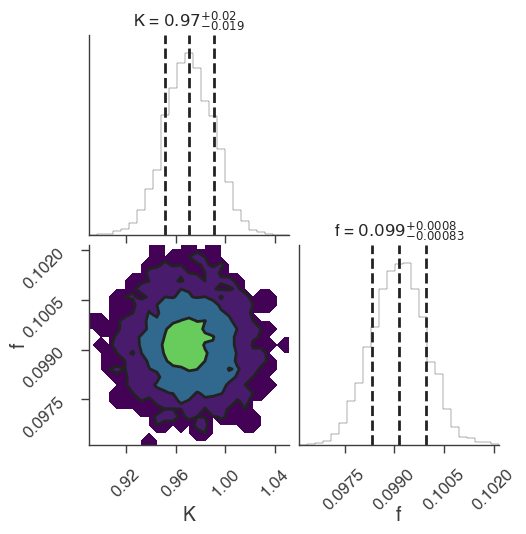

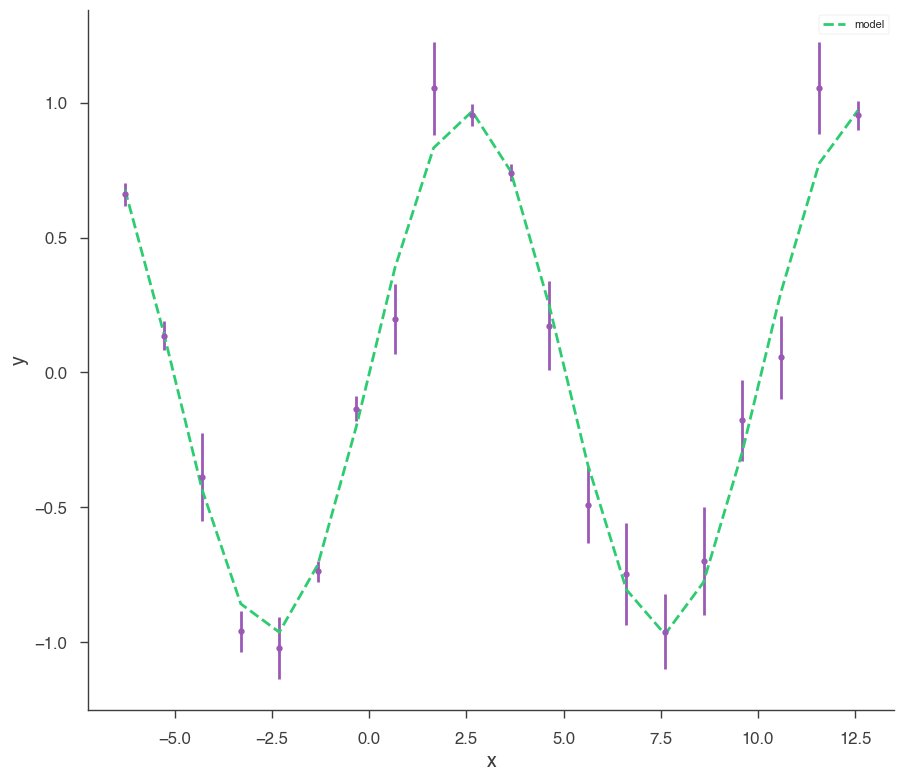

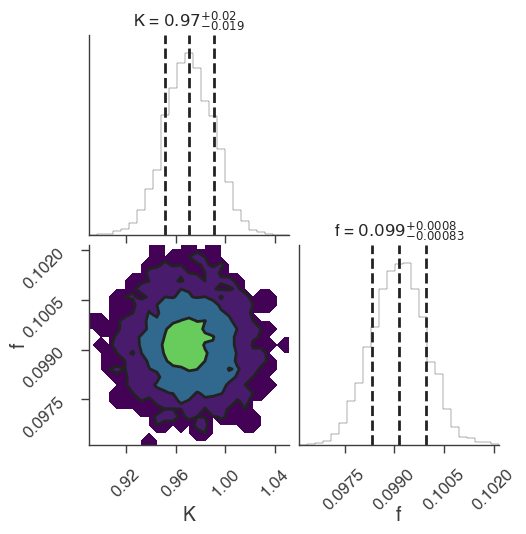

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

12:18:01 INFO      sampler set to zeus                                                     ]8;id=993366;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=524687;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 4/625 [00:00<00:17, 35.08it/s]

Sampling progress :   1%|▏         | 8/625 [00:00<00:17, 35.94it/s]

Sampling progress :   2%|▏         | 12/625 [00:00<00:17, 34.52it/s]

Sampling progress :   3%|▎         | 16/625 [00:00<00:17, 34.79it/s]

Sampling progress :   3%|▎         | 20/625 [00:00<00:17, 35.12it/s]

Sampling progress :   4%|▍         | 24/625 [00:00<00:16, 35.85it/s]

Sampling progress :   4%|▍         | 28/625 [00:00<00:16, 36.24it/s]

Sampling progress :   5%|▌         | 32/625 [00:00<00:17, 33.74it/s]

Sampling progress :   6%|▌         | 36/625 [00:01<00:17, 33.34it/s]

Sampling progress :   6%|▋         | 40/625 [00:01<00:16, 34.71it/s]

Sampling progress :   7%|▋         | 44/625 [00:01<00:16, 35.07it/s]

Sampling progress :   8%|▊         | 48/625 [00:01<00:16, 34.31it/s]

Sampling progress :   8%|▊         | 52/625 [00:01<00:16, 35.63it/s]

Sampling progress :   9%|▉         | 56/625 [00:01<00:16, 35.16it/s]

Sampling progress :  10%|▉         | 60/625 [00:01<00:16, 35.16it/s]

Sampling progress :  10%|█         | 64/625 [00:01<00:16, 34.80it/s]

Sampling progress :  11%|█         | 68/625 [00:01<00:15, 35.70it/s]

Sampling progress :  12%|█▏        | 72/625 [00:02<00:16, 34.35it/s]

Sampling progress :  12%|█▏        | 76/625 [00:02<00:15, 35.15it/s]

Sampling progress :  13%|█▎        | 80/625 [00:02<00:15, 35.30it/s]

Sampling progress :  13%|█▎        | 84/625 [00:02<00:15, 35.40it/s]

Sampling progress :  14%|█▍        | 88/625 [00:02<00:15, 35.19it/s]

Sampling progress :  15%|█▍        | 92/625 [00:02<00:15, 35.23it/s]

Sampling progress :  15%|█▌        | 96/625 [00:02<00:14, 35.46it/s]

Sampling progress :  16%|█▌        | 100/625 [00:02<00:14, 35.26it/s]

Sampling progress :  17%|█▋        | 104/625 [00:02<00:14, 35.38it/s]

Sampling progress :  17%|█▋        | 108/625 [00:03<00:16, 31.87it/s]

Sampling progress :  18%|█▊        | 112/625 [00:03<00:15, 33.74it/s]

Sampling progress :  19%|█▊        | 116/625 [00:03<00:14, 34.32it/s]

Sampling progress :  19%|█▉        | 120/625 [00:03<00:15, 32.64it/s]

Sampling progress :  20%|█▉        | 124/625 [00:03<00:14, 34.25it/s]

Sampling progress :  20%|██        | 128/625 [00:03<00:14, 35.38it/s]

Sampling progress :  21%|██▏       | 133/625 [00:03<00:13, 36.85it/s]

Sampling progress :  22%|██▏       | 137/625 [00:03<00:13, 36.60it/s]

Sampling progress :  23%|██▎       | 141/625 [00:04<00:13, 35.71it/s]

Sampling progress :  23%|██▎       | 145/625 [00:04<00:13, 36.51it/s]

Sampling progress :  24%|██▍       | 149/625 [00:04<00:13, 36.57it/s]

Sampling progress :  24%|██▍       | 153/625 [00:04<00:12, 36.55it/s]

Sampling progress :  25%|██▌       | 157/625 [00:04<00:12, 36.82it/s]

Sampling progress :  26%|██▌       | 161/625 [00:04<00:12, 35.92it/s]

Sampling progress :  26%|██▋       | 165/625 [00:04<00:12, 35.76it/s]

Sampling progress :  27%|██▋       | 169/625 [00:04<00:12, 35.52it/s]

Sampling progress :  28%|██▊       | 173/625 [00:04<00:12, 36.23it/s]

Sampling progress :  28%|██▊       | 177/625 [00:05<00:12, 35.71it/s]

Sampling progress :  29%|██▉       | 181/625 [00:05<00:12, 34.81it/s]

Sampling progress :  30%|██▉       | 185/625 [00:05<00:12, 35.48it/s]

Sampling progress :  30%|███       | 189/625 [00:05<00:12, 35.23it/s]

Sampling progress :  31%|███       | 193/625 [00:05<00:12, 35.67it/s]

Sampling progress :  32%|███▏      | 197/625 [00:05<00:11, 36.14it/s]

Sampling progress :  32%|███▏      | 201/625 [00:05<00:11, 36.00it/s]

Sampling progress :  33%|███▎      | 205/625 [00:05<00:11, 36.47it/s]

Sampling progress :  33%|███▎      | 209/625 [00:05<00:11, 35.60it/s]

Sampling progress :  34%|███▍      | 213/625 [00:06<00:11, 35.33it/s]

Sampling progress :  35%|███▍      | 217/625 [00:06<00:11, 35.04it/s]

Sampling progress :  35%|███▌      | 221/625 [00:06<00:11, 34.72it/s]

Sampling progress :  36%|███▌      | 225/625 [00:06<00:11, 35.88it/s]

Sampling progress :  37%|███▋      | 229/625 [00:06<00:11, 34.45it/s]

Sampling progress :  37%|███▋      | 233/625 [00:06<00:11, 35.33it/s]

Sampling progress :  38%|███▊      | 237/625 [00:06<00:10, 35.88it/s]

Sampling progress :  39%|███▊      | 241/625 [00:06<00:10, 36.90it/s]

Sampling progress :  39%|███▉      | 245/625 [00:06<00:10, 36.46it/s]

Sampling progress :  40%|███▉      | 249/625 [00:07<00:10, 36.34it/s]

Sampling progress :  40%|████      | 253/625 [00:07<00:10, 36.40it/s]

Sampling progress :  41%|████      | 257/625 [00:07<00:10, 36.28it/s]

Sampling progress :  42%|████▏     | 261/625 [00:07<00:10, 35.76it/s]

Sampling progress :  42%|████▏     | 265/625 [00:07<00:10, 35.05it/s]

Sampling progress :  43%|████▎     | 269/625 [00:07<00:10, 34.71it/s]

Sampling progress :  44%|████▎     | 273/625 [00:07<00:09, 35.38it/s]

Sampling progress :  44%|████▍     | 277/625 [00:07<00:09, 35.50it/s]

Sampling progress :  45%|████▍     | 281/625 [00:07<00:09, 35.70it/s]

Sampling progress :  46%|████▌     | 285/625 [00:08<00:09, 35.67it/s]

Sampling progress :  46%|████▌     | 289/625 [00:08<00:09, 36.57it/s]

Sampling progress :  47%|████▋     | 293/625 [00:08<00:09, 35.85it/s]

Sampling progress :  48%|████▊     | 297/625 [00:08<00:09, 36.08it/s]

Sampling progress :  48%|████▊     | 301/625 [00:08<00:08, 36.75it/s]

Sampling progress :  49%|████▉     | 305/625 [00:08<00:08, 36.17it/s]

Sampling progress :  49%|████▉     | 309/625 [00:08<00:08, 36.58it/s]

Sampling progress :  50%|█████     | 313/625 [00:08<00:08, 34.76it/s]

Sampling progress :  51%|█████     | 317/625 [00:08<00:08, 34.61it/s]

Sampling progress :  51%|█████▏    | 321/625 [00:09<00:08, 34.90it/s]

Sampling progress :  52%|█████▏    | 325/625 [00:09<00:08, 34.73it/s]

Sampling progress :  53%|█████▎    | 329/625 [00:09<00:08, 35.61it/s]

Sampling progress :  53%|█████▎    | 333/625 [00:09<00:07, 36.50it/s]

Sampling progress :  54%|█████▍    | 337/625 [00:09<00:07, 36.62it/s]

Sampling progress :  55%|█████▍    | 341/625 [00:09<00:08, 35.37it/s]

Sampling progress :  55%|█████▌    | 345/625 [00:09<00:07, 35.43it/s]

Sampling progress :  56%|█████▌    | 349/625 [00:09<00:07, 35.61it/s]

Sampling progress :  56%|█████▋    | 353/625 [00:09<00:07, 35.27it/s]

Sampling progress :  57%|█████▋    | 357/625 [00:10<00:07, 34.68it/s]

Sampling progress :  58%|█████▊    | 361/625 [00:10<00:07, 34.46it/s]

Sampling progress :  58%|█████▊    | 365/625 [00:10<00:07, 34.85it/s]

Sampling progress :  59%|█████▉    | 369/625 [00:10<00:07, 35.00it/s]

Sampling progress :  60%|█████▉    | 373/625 [00:10<00:07, 34.51it/s]

Sampling progress :  60%|██████    | 377/625 [00:10<00:07, 35.24it/s]

Sampling progress :  61%|██████    | 381/625 [00:10<00:07, 30.68it/s]

Sampling progress :  62%|██████▏   | 385/625 [00:10<00:07, 31.34it/s]

Sampling progress :  62%|██████▏   | 389/625 [00:11<00:07, 31.84it/s]

Sampling progress :  63%|██████▎   | 393/625 [00:11<00:06, 33.75it/s]

Sampling progress :  64%|██████▎   | 397/625 [00:11<00:06, 32.63it/s]

Sampling progress :  64%|██████▍   | 401/625 [00:11<00:06, 33.49it/s]

Sampling progress :  65%|██████▍   | 405/625 [00:11<00:06, 33.88it/s]

Sampling progress :  65%|██████▌   | 409/625 [00:11<00:06, 34.30it/s]

Sampling progress :  66%|██████▌   | 413/625 [00:11<00:06, 35.12it/s]

Sampling progress :  67%|██████▋   | 417/625 [00:11<00:06, 34.64it/s]

Sampling progress :  67%|██████▋   | 421/625 [00:11<00:05, 35.03it/s]

Sampling progress :  68%|██████▊   | 425/625 [00:12<00:05, 35.13it/s]

Sampling progress :  69%|██████▊   | 429/625 [00:12<00:05, 36.12it/s]

Sampling progress :  69%|██████▉   | 433/625 [00:12<00:05, 36.86it/s]

Sampling progress :  70%|███████   | 438/625 [00:12<00:04, 37.64it/s]

Sampling progress :  71%|███████   | 442/625 [00:12<00:04, 37.15it/s]

Sampling progress :  71%|███████▏  | 446/625 [00:12<00:04, 35.80it/s]

Sampling progress :  72%|███████▏  | 450/625 [00:12<00:04, 36.04it/s]

Sampling progress :  73%|███████▎  | 454/625 [00:12<00:04, 35.54it/s]

Sampling progress :  73%|███████▎  | 458/625 [00:13<00:04, 35.36it/s]

Sampling progress :  74%|███████▍  | 462/625 [00:13<00:04, 35.20it/s]

Sampling progress :  75%|███████▍  | 466/625 [00:13<00:04, 33.39it/s]

Sampling progress :  75%|███████▌  | 470/625 [00:13<00:04, 34.10it/s]

Sampling progress :  76%|███████▌  | 474/625 [00:13<00:04, 34.93it/s]

Sampling progress :  76%|███████▋  | 478/625 [00:13<00:04, 33.76it/s]

Sampling progress :  77%|███████▋  | 482/625 [00:13<00:04, 34.94it/s]

Sampling progress :  78%|███████▊  | 486/625 [00:13<00:03, 35.34it/s]

Sampling progress :  78%|███████▊  | 490/625 [00:13<00:03, 35.57it/s]

Sampling progress :  79%|███████▉  | 494/625 [00:14<00:03, 35.63it/s]

Sampling progress :  80%|███████▉  | 498/625 [00:14<00:03, 35.73it/s]

Sampling progress :  80%|████████  | 502/625 [00:14<00:03, 34.58it/s]

Sampling progress :  81%|████████  | 506/625 [00:14<00:03, 35.40it/s]

Sampling progress :  82%|████████▏ | 510/625 [00:14<00:03, 36.47it/s]

Sampling progress :  82%|████████▏ | 514/625 [00:14<00:03, 36.25it/s]

Sampling progress :  83%|████████▎ | 518/625 [00:14<00:02, 35.95it/s]

Sampling progress :  84%|████████▎ | 522/625 [00:14<00:02, 35.28it/s]

Sampling progress :  84%|████████▍ | 526/625 [00:14<00:02, 34.54it/s]

Sampling progress :  85%|████████▍ | 530/625 [00:15<00:02, 33.83it/s]

Sampling progress :  85%|████████▌ | 534/625 [00:15<00:02, 33.94it/s]

Sampling progress :  86%|████████▌ | 538/625 [00:15<00:02, 34.84it/s]

Sampling progress :  87%|████████▋ | 542/625 [00:15<00:02, 35.51it/s]

Sampling progress :  87%|████████▋ | 546/625 [00:15<00:02, 34.98it/s]

Sampling progress :  88%|████████▊ | 550/625 [00:15<00:02, 35.21it/s]

Sampling progress :  89%|████████▊ | 554/625 [00:15<00:01, 35.88it/s]

Sampling progress :  89%|████████▉ | 558/625 [00:15<00:01, 35.80it/s]

Sampling progress :  90%|████████▉ | 562/625 [00:15<00:01, 35.86it/s]

Sampling progress :  91%|█████████ | 566/625 [00:16<00:01, 36.25it/s]

Sampling progress :  91%|█████████ | 570/625 [00:16<00:01, 34.80it/s]

Sampling progress :  92%|█████████▏| 574/625 [00:16<00:01, 35.97it/s]

Sampling progress :  92%|█████████▏| 578/625 [00:16<00:01, 35.55it/s]

Sampling progress :  93%|█████████▎| 583/625 [00:16<00:01, 36.60it/s]

Sampling progress :  94%|█████████▍| 587/625 [00:16<00:01, 36.45it/s]

Sampling progress :  95%|█████████▍| 591/625 [00:16<00:00, 36.45it/s]

Sampling progress :  95%|█████████▌| 595/625 [00:16<00:00, 37.16it/s]

Sampling progress :  96%|█████████▌| 599/625 [00:16<00:00, 36.09it/s]

Sampling progress :  96%|█████████▋| 603/625 [00:17<00:00, 34.53it/s]

Sampling progress :  97%|█████████▋| 607/625 [00:17<00:00, 34.27it/s]

Sampling progress :  98%|█████████▊| 611/625 [00:17<00:00, 35.38it/s]

Sampling progress :  98%|█████████▊| 615/625 [00:17<00:00, 34.71it/s]

Sampling progress :  99%|█████████▉| 619/625 [00:17<00:00, 35.42it/s]

Sampling progress : 100%|█████████▉| 623/625 [00:17<00:00, 35.74it/s]

Sampling progress : 100%|██████████| 625/625 [00:17<00:00, 35.24it/s]

12:18:19 INFO      fit restored to maximum of posterior                                         ]8;id=739336;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=810683;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=998620;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=551305;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 43


Scale Factor: 1.347426


Mean Integrated Autocorrelation Time: 3.15


Effective Sample Size: 3971.27


Number of Log Probability Evaluations: 64574


Effective Samples per Log Probability Evaluation: 0.0615


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.71 -0.19 +0.20) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.91 +/- 0.08) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.991127
total,-7.991127


Values of statistical measures:

,statistical measures
AIC,20.688136
BIC,21.973718
DIC,19.954527
PDIC,1.985808


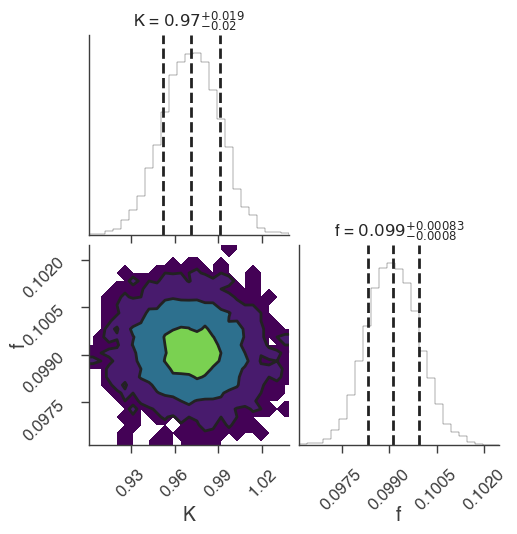

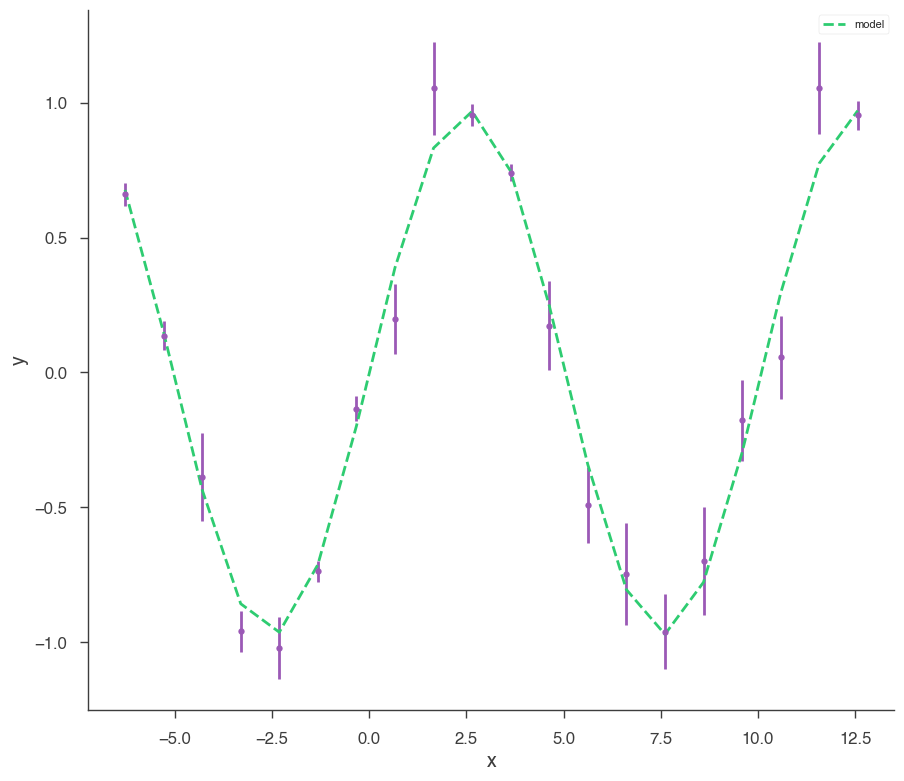

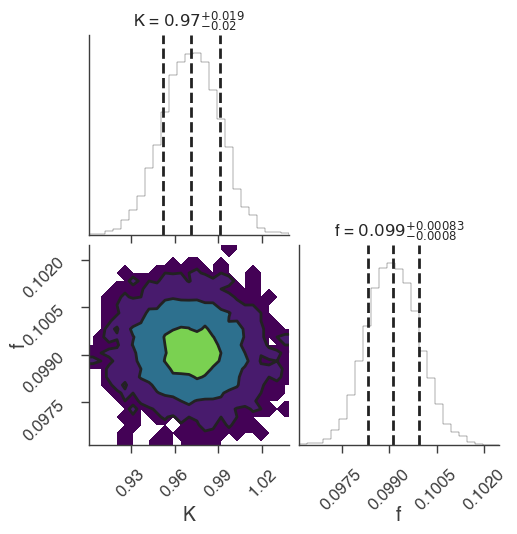

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

12:18:20 INFO      sampler set to ultranest                                                ]8;id=424319;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=418247;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-8  


[ultranest] Likelihood function evaluations: 6764


[ultranest]   logZ = -16.7 +- 0.1186


[ultranest] Effective samples strategy satisfied (ESS = 977.0, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.09 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.14 bs:0.12 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


12:18:31 INFO      fit restored to maximum of posterior                                         ]8;id=995914;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=604336;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=710513;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=269183;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.71 -0.20 +0.19) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.91 +/- 0.08) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-7.991613
total,-7.991613


Values of statistical measures:

,statistical measures
AIC,20.689108
BIC,21.974690
DIC,20.016036
PDIC,2.016547
log(Z),-7.260180


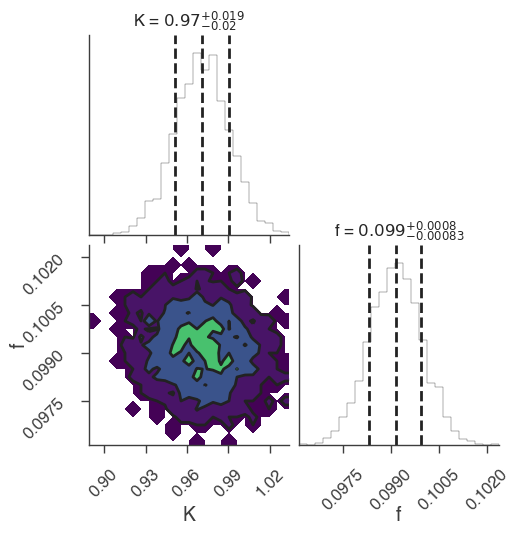

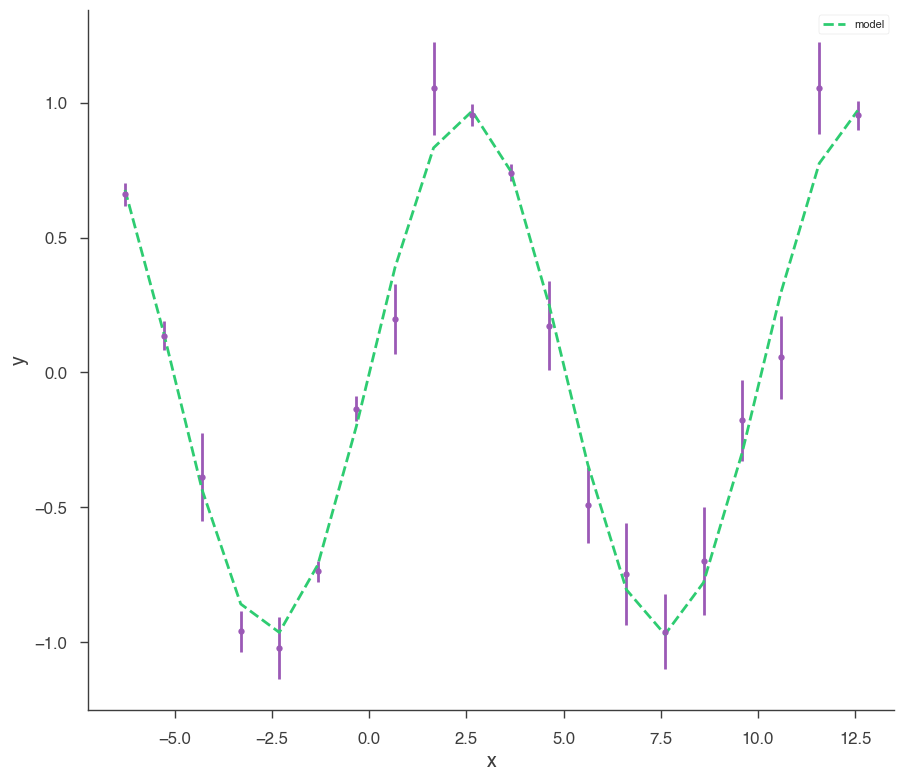

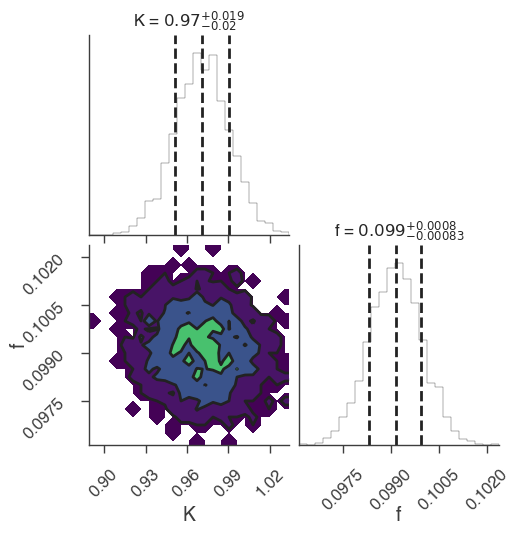

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()